<a href="https://colab.research.google.com/github/fongbubble/fongbubble_UoB_EFIMM0142_Individual_Assessment/blob/main/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [ ]:
!pip install pulp
from pulp import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 29.0 MB/s eta 0:00:00


# Question 4

## Question 4.a

In [ ]:
# Parameters
products = ["A", "B", "C", "D"]; warehouses = ["W1", "W2", "W3"]; distribution_centers = ["DC1", "DC2", "DC3", "DC4", "DC5", "DC6"]
production_to_warehouse_costs = {"A": {"W1": 4, "W2": 3, "W3": 5}, "B": {"W1": 6, "W2": 2, "W3": 4}, "C": {"W1": 5, "W2": 4, "W3": 3}, "D": {"W1": 7, "W2": 5, "W3": 6}}
warehouse_to_distribution_costs = {"W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7}, "W2": {"DC1": 1, "DC2": 4, "DC3": 2, "DC4": 3, "DC5": 5, "DC6": 6}, "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4}}
production_supply = {"A": 70, "B": 90, "C": 80, "D": 60}; distribution_demand = {"DC1": 50, "DC2": 40, "DC3": 60, "DC4": 70, "DC5": 50, "DC6": 30}

# Initialize Problem
model = LpProblem("Question4_a", LpMinimize)

# Decision Variables
x = {(p, w): LpVariable(f"x_{p}_{w}", lowBound=0) for p in products for w in warehouses}
y = {(w, dc): LpVariable(f"y_{w}_{dc}", lowBound=0) for w in warehouses for dc in distribution_centers}

# Objective Function
model += lpSum(production_to_warehouse_costs[p][w] * x[p, w] for p in products for w in warehouses) + lpSum(warehouse_to_distribution_costs[w][dc] * y[w, dc] for w in warehouses for dc in distribution_centers)

# Constraints

# Production supply constraints
for p in products: model += lpSum(x[p, w] for w in warehouses) <= production_supply[p]

# Distribution demand constraints
for dc in distribution_centers: model += lpSum(y[w, dc] for w in warehouses) >= distribution_demand[dc]

# Flow balance at warehouses
for w in warehouses: model += lpSum(x[p, w] for p in products) == lpSum(y[w, dc] for dc in distribution_centers)

# Step 5: Solve the Model
model.solve()

# Step 6: Display Results
print("Optimal Transportation Cost:", value(model.objective))
print("\nProduction to Warehouses:")
for p in products:
    for w in warehouses:
        if x[p, w].varValue > 0:
            print(f"{p} to {w}: {x[p, w].varValue} units")
print("\nWarehouses to Distribution Centres:")
for w in warehouses:
    for dc in distribution_centers:
        if y[w, dc].varValue > 0:
            print(f"{w} to {dc}: {y[w, dc].varValue} units")

Optimal Transportation Cost: 1700.0

Production to Warehouses:
A to W1: 40.0 units
A to W2: 30.0 units
B to W2: 90.0 units
C to W3: 80.0 units
D to W2: 60.0 units

Warehouses to Distribution Centres:
W1 to DC2: 40.0 units
W2 to DC1: 50.0 units
W2 to DC3: 60.0 units
W2 to DC4: 70.0 units
W3 to DC5: 50.0 units
W3 to DC6: 30.0 units


In [ ]:
model

Question4_a:
MINIMIZE
4*x_A_W1 + 3*x_A_W2 + 5*x_A_W3 + 6*x_B_W1 + 2*x_B_W2 + 4*x_B_W3 + 5*x_C_W1 + 4*x_C_W2 + 3*x_C_W3 + 7*x_D_W1 + 5*x_D_W2 + 6*x_D_W3 + 3*y_W1_DC1 + 2*y_W1_DC2 + 5*y_W1_DC3 + 4*y_W1_DC4 + 6*y_W1_DC5 + 7*y_W1_DC6 + 1*y_W2_DC1 + 4*y_W2_DC2 + 2*y_W2_DC3 + 3*y_W2_DC4 + 5*y_W2_DC5 + 6*y_W2_DC6 + 5*y_W3_DC1 + 3*y_W3_DC2 + 4*y_W3_DC3 + 2*y_W3_DC4 + 3*y_W3_DC5 + 4*y_W3_DC6 + 0
SUBJECT TO
_C1: x_A_W1 + x_A_W2 + x_A_W3 <= 70

_C2: x_B_W1 + x_B_W2 + x_B_W3 <= 90

_C3: x_C_W1 + x_C_W2 + x_C_W3 <= 80

_C4: x_D_W1 + x_D_W2 + x_D_W3 <= 60

_C5: y_W1_DC1 + y_W2_DC1 + y_W3_DC1 >= 50

_C6: y_W1_DC2 + y_W2_DC2 + y_W3_DC2 >= 40

_C7: y_W1_DC3 + y_W2_DC3 + y_W3_DC3 >= 60

_C8: y_W1_DC4 + y_W2_DC4 + y_W3_DC4 >= 70

_C9: y_W1_DC5 + y_W2_DC5 + y_W3_DC5 >= 50

_C10: y_W1_DC6 + y_W2_DC6 + y_W3_DC6 >= 30

_C11: x_A_W1 + x_B_W1 + x_C_W1 + x_D_W1 - y_W1_DC1 - y_W1_DC2 - y_W1_DC3
 - y_W1_DC4 - y_W1_DC5 - y_W1_DC6 = 0

_C12: x_A_W2 + x_B_W2 + x_C_W2 + x_D_W2 - y_W2_DC1 - y_W2_DC2 - y_W2_DC3
 - y_W2

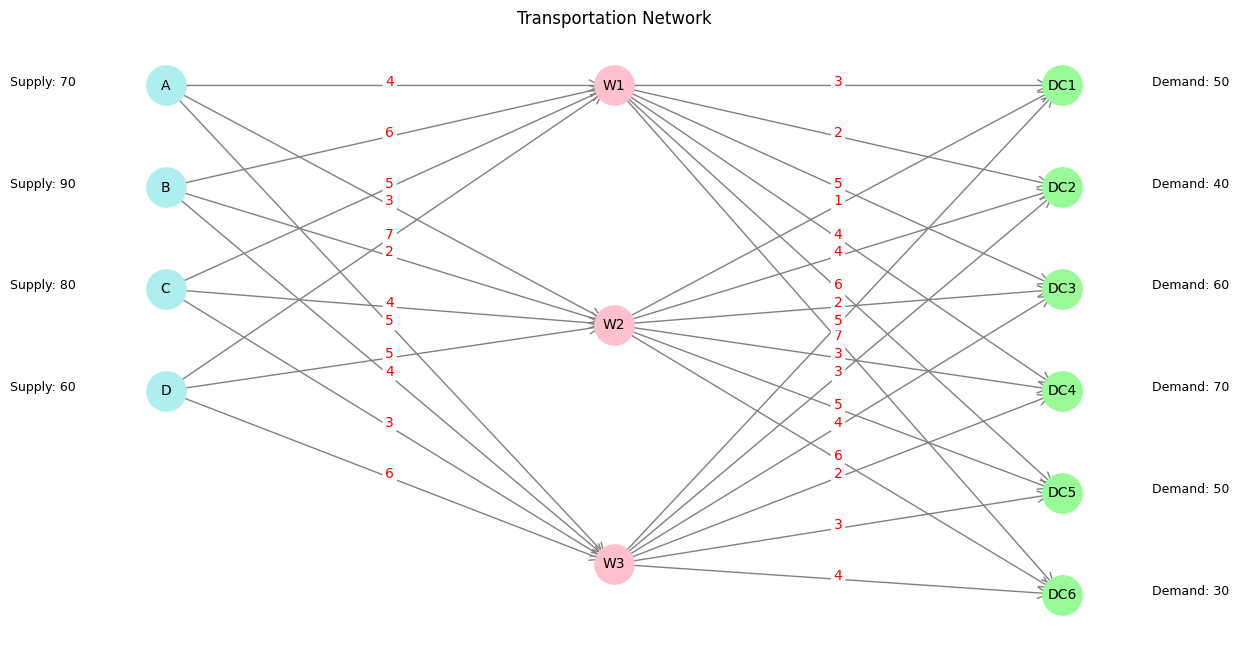

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
products = ["A", "B", "C", "D"]
warehouses = ["W1", "W2", "W3"]
distribution_centers = ["DC1", "DC2", "DC3", "DC4", "DC5", "DC6"]
production_to_warehouse_costs = {"A": {"W1": 4, "W2": 3, "W3": 5}, "B": {"W1": 6, "W2": 2, "W3": 4}, "C": {"W1": 5, "W2": 4, "W3": 3}, "D": {"W1": 7, "W2": 5, "W3": 6}}
warehouse_to_distribution_costs = {"W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7}, "W2": {"DC1": 1, "DC2": 4, "DC3": 2, "DC4": 3, "DC5": 5, "DC6": 6}, "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4}}

# Supply and Demand values
supply = {"A": 70, "B": 90, "C": 80, "D": 60}
demand = {"DC1": 50, "DC2": 40, "DC3": 60, "DC4": 70, "DC5": 50, "DC6": 30}

# Create a directed graph
G = nx.DiGraph()

# Add edges for Production Centers to Warehouses
for product, costs in production_to_warehouse_costs.items():
    for warehouse, cost in costs.items():
        G.add_edge(product, warehouse, weight=cost)

# Add edges for Warehouses to Distribution Centers
for warehouse, costs in warehouse_to_distribution_costs.items():
    for dc, cost in costs.items():
        G.add_edge(warehouse, dc, weight=cost)

# Define positions for a cleaner layout
pos = {}
# Production nodes vertically on the left
for i, product in enumerate(products):
    pos[product] = (0, -i)
# Warehouses more widely spaced vertically in the middle
for i, warehouse in enumerate(warehouses):
    pos[warehouse] = (1, -i * 2.35)
# Distribution centers vertically on the right
for i, dc in enumerate(distribution_centers):
    pos[dc] = (2, -i)

# Draw the graph
plt.figure(figsize=(14, 8))
# Draw nodes with different colors
nx.draw_networkx_nodes(G, pos, nodelist=products, node_size=800, node_color="paleturquoise")
nx.draw_networkx_nodes(G, pos, nodelist=warehouses, node_size=800, node_color="pink")
nx.draw_networkx_nodes(G, pos, nodelist=distribution_centers, node_size=800, node_color="palegreen")

# Draw edges and labels
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Add supply and demand labels outside the nodes
for node, (x, y) in pos.items():
    if node in supply:  # Supply nodes
        plt.text(x - 0.2, y, f"Supply: {supply[node]}", fontsize=9, color="black", ha="right")
    elif node in demand:  # Demand nodes
        plt.text(x + 0.2, y, f"Demand: {demand[node]}", fontsize=9, color="black", ha="left")

# Add edge labels (costs) with a white background near the middle of edges
edge_labels = nx.get_edge_attributes(G, 'weight')
for (u, v), label in edge_labels.items():
    label_pos = ((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2)
    plt.text(
        label_pos[0], label_pos[1], str(label),
        fontsize=10, color="red", ha="center",
        bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.2")
    )

plt.title("Transportation Network")
plt.axis("off")
plt.show()


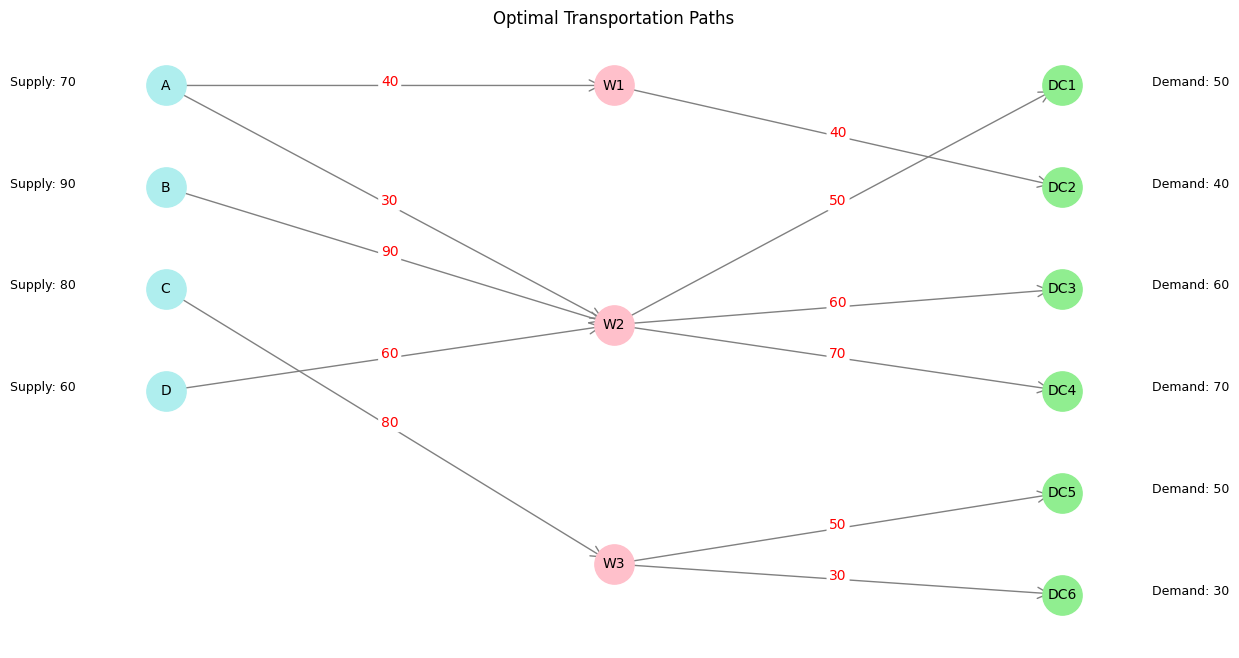

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Supply and demand values
supply = {"A": 70, "B": 90, "C": 80, "D": 60}
demand = {"DC1": 50, "DC2": 40, "DC3": 60, "DC4": 70, "DC5": 50, "DC6": 30}

# Optimal flows
production_to_warehouse_flows = {"A": {"W1": 40, "W2": 30}, "B": {"W2": 90}, "C": {"W3": 80}, "D": {"W2": 60}}
warehouse_to_distribution_flows = {"W1": {"DC2": 40}, "W2": {"DC1": 50, "DC3": 60, "DC4": 70}, "W3": {"DC5": 50, "DC6": 30}}

# Create a directed graph with only optimal paths
optimal_G = nx.DiGraph()

# Add edges for Production Centers to Warehouses with only optimal flows
for product, flows in production_to_warehouse_flows.items():
    for warehouse, flow in flows.items():
        optimal_G.add_edge(product, warehouse, weight=flow)

# Add edges for Warehouses to Distribution Centers with only optimal flows
for warehouse, flows in warehouse_to_distribution_flows.items():
    for dc, flow in flows.items():
        optimal_G.add_edge(warehouse, dc, weight=flow)

# Define positions for a cleaner layout
pos = {}
# Production nodes vertically on the left
products = ["A", "B", "C", "D"]
warehouses = ["W1", "W2", "W3"]
distribution_centers = ["DC1", "DC2", "DC3", "DC4", "DC5", "DC6"]

for i, product in enumerate(products):
    pos[product] = (0, -i)
# Warehouses more widely spaced vertically in the middle
for i, warehouse in enumerate(warehouses):
    pos[warehouse] = (1, -i * 2.35)
# Distribution centers vertically on the right
for i, dc in enumerate(distribution_centers):
    pos[dc] = (2, -i)

plt.figure(figsize=(14, 8))
# Draw nodes with updated colors
nx.draw_networkx_nodes(optimal_G, pos, nodelist=products, node_size=800, node_color="paleturquoise")  # Products: Pale Turquoise
nx.draw_networkx_nodes(optimal_G, pos, nodelist=warehouses, node_size=800, node_color="pink")  # Warehouses: Pink
nx.draw_networkx_nodes(optimal_G, pos, nodelist=distribution_centers, node_size=800, node_color="lightgreen")  # Distribution Centers: Light Green

# Draw edges and labels
nx.draw_networkx_edges(optimal_G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(optimal_G, pos, font_size=10, font_color="black")

# Add supply and demand labels near the nodes
for node, (x, y) in pos.items():
    if node in supply:  # Supply nodes
        plt.text(x - 0.2, y, f"Supply: {supply[node]}", fontsize=9, color="black", ha="right")
    elif node in demand:  # Demand nodes
        plt.text(x + 0.2, y, f"Demand: {demand[node]}", fontsize=9, color="black", ha="left")

# Add edge flow labels with a white background
edge_labels = nx.get_edge_attributes(optimal_G, 'weight')
for (u, v), label in edge_labels.items():
    label_pos = ((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2)
    plt.text(
        label_pos[0], label_pos[1], f"{label}",
        fontsize=10, color="red", ha="center", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.2")
    )

plt.title("Optimal Transportation Paths")
plt.axis("off")
plt.show()


## Question 4.b

In [ ]:
# Parameters
products = ["A", "B", "C", "D"]; warehouses = ["W1", "W2", "W3"]; distribution_centers = ["DC1", "DC2", "DC3", "DC4", "DC5", "DC6"]
# Increased costs for W2 in production to warehouse
production_to_warehouse_costs = {
    "A": {"W1": 4, "W2": 4, "W3": 5},  # Increased W2 cost by £1
    "B": {"W1": 6, "W2": 3, "W3": 4},  # Increased W2 cost by £1
    "C": {"W1": 5, "W2": 5, "W3": 3},  # Increased W2 cost by £1
    "D": {"W1": 7, "W2": 6, "W3": 6},  # Increased W2 cost by £1
}
# Increased costs for W2 in warehouse to distribution centers
warehouse_to_distribution_costs = {
    "W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7},
    "W2": {"DC1": 2, "DC2": 5, "DC3": 3, "DC4": 4, "DC5": 6, "DC6": 7},  # Increased by £1
    "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4},
}
production_supply = {"A": 70, "B": 90, "C": 80, "D": 60}; distribution_demand = {"DC1": 50, "DC2": 40, "DC3": 60, "DC4": 70, "DC5": 50, "DC6": 30}

# Step 1: Initialize Problem
model = LpProblem("Question4_b", LpMinimize)

# Step 2: Variables
x = {(p, w): LpVariable(f"x_{p}_{w}", lowBound=0) for p in products for w in warehouses}
y = {(w, dc): LpVariable(f"y_{w}_{dc}", lowBound=0) for w in warehouses for dc in distribution_centers}

# Step 3: Objective Function
model += lpSum(production_to_warehouse_costs[p][w] * x[p, w] for p in products for w in warehouses) + lpSum(warehouse_to_distribution_costs[w][dc] * y[w, dc] for w in warehouses for dc in distribution_centers)

# Step 4: Constraints
for p in products: model += lpSum(x[p, w] for w in warehouses) <= production_supply[p]  # Production supply constraints
for dc in distribution_centers: model += lpSum(y[w, dc] for w in warehouses) >= distribution_demand[dc]  # Distribution demand constraints
for w in warehouses: model += lpSum(x[p, w] for p in products) == lpSum(y[w, dc] for dc in distribution_centers)  # Flow balance at warehouses

# Step 5: Solve the Model
model.solve()

# Step 6: Display Results
print("Optimal Transportation Cost \nafter increasing of W2:", value(model.objective))
print("\nProduction to Warehouses:")
for p in products:
    for w in warehouses:
        if x[p, w].varValue > 0:
            print(f"{p} to {w}: {x[p, w].varValue} units")
print("\nWarehouses to Distribution Centres:")
for w in warehouses:
    for dc in distribution_centers:
        if y[w, dc].varValue > 0:
            print(f"{w} to {dc}: {y[w, dc].varValue} units")


Optimal Transportation Cost 
after increasing of W2: 1930.0

Production to Warehouses:
A to W1: 40.0 units
A to W2: 30.0 units
B to W2: 80.0 units
B to W3: 10.0 units
C to W3: 80.0 units
D to W3: 60.0 units

Warehouses to Distribution Centres:
W1 to DC2: 40.0 units
W2 to DC1: 50.0 units
W2 to DC3: 60.0 units
W3 to DC4: 70.0 units
W3 to DC5: 50.0 units
W3 to DC6: 30.0 units


## Question 4.c

In [ ]:
# Parameters
products = ["A", "B", "C", "D"]; warehouses = ["W1", "W2", "W3"]; distribution_centers = ["DC1", "DC2", "DC3", "DC4", "DC5", "DC6"]
production_to_warehouse_costs = {"A": {"W1": 4, "W2": 3, "W3": 5}, "B": {"W1": 6, "W2": 2, "W3": 4}, "C": {"W1": 5, "W2": 4, "W3": 3}, "D": {"W1": 7, "W2": 5, "W3": 6}}
warehouse_to_distribution_costs = {"W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7}, "W2": {"DC1": 1, "DC2": 4, "DC3": 2, "DC4": 3, "DC5": 5, "DC6": 6}, "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4}}
production_supply = {"A": 70, "B": 90, "C": 80, "D": 60}; distribution_demand = {"DC1": 50, "DC2": 40, "DC3": 60, "DC4": 70, "DC5": 50, "DC6": 30}

# Step 1: Initialize Problem
model = LpProblem("Supply_Chain_Optimization", LpMinimize)

# Step 2: Variables
x = {(p, w): LpVariable(f"x_{p}_{w}", lowBound=0) for p in products for w in warehouses}
y = {(w, dc): LpVariable(f"y_{w}_{dc}", lowBound=0) for w in warehouses for dc in distribution_centers}

# Step 3: Objective Function
model += lpSum(production_to_warehouse_costs[p][w] * x[p, w] for p in products for w in warehouses) + lpSum(warehouse_to_distribution_costs[w][dc] * y[w, dc] for w in warehouses for dc in distribution_centers)

# Step 4: Constraints
for p in products: model += lpSum(x[p, w] for w in warehouses) <= production_supply[p]  # Production supply constraints
for dc in distribution_centers: model += lpSum(y[w, dc] for w in warehouses) >= distribution_demand[dc]  # Distribution demand constraints
for w in warehouses: model += lpSum(x[p, w] for p in products) == lpSum(y[w, dc] for dc in distribution_centers)  # Flow balance at warehouses

# New Capacity Restriction for W1
model += lpSum(x[p, "W1"] for p in products) <= 50, "Capacity_Constraint_W1"

# Step 5: Solve the Model
model.solve()

# Step 6: Display Results
print("Optimal Transportation Cost with W1 Capacity Restriction:", value(model.objective))
print("\nProduction to Warehouses:")
for p in products:
    for w in warehouses:
        if x[p, w].varValue > 0:
            print(f"{p} to {w}: {x[p, w].varValue} units")
print("\nWarehouses to Distribution Centers:")
for w in warehouses:
    for dc in distribution_centers:
        if y[w, dc].varValue > 0:
            print(f"{w} to {dc}: {y[w, dc].varValue} units")

Optimal Transportation Cost with W1 Capacity Restriction: 1700.0

Production to Warehouses:
A to W1: 40.0 units
A to W2: 30.0 units
B to W2: 90.0 units
C to W3: 80.0 units
D to W2: 60.0 units

Warehouses to Distribution Centers:
W1 to DC2: 40.0 units
W2 to DC1: 50.0 units
W2 to DC3: 60.0 units
W2 to DC4: 70.0 units
W3 to DC5: 50.0 units
W3 to DC6: 30.0 units


In [ ]:
model

Supply_Chain_Optimization:
MINIMIZE
4*x_A_W1 + 3*x_A_W2 + 5*x_A_W3 + 6*x_B_W1 + 2*x_B_W2 + 4*x_B_W3 + 5*x_C_W1 + 4*x_C_W2 + 3*x_C_W3 + 7*x_D_W1 + 5*x_D_W2 + 6*x_D_W3 + 3*y_W1_DC1 + 2*y_W1_DC2 + 5*y_W1_DC3 + 4*y_W1_DC4 + 6*y_W1_DC5 + 7*y_W1_DC6 + 1*y_W2_DC1 + 4*y_W2_DC2 + 2*y_W2_DC3 + 3*y_W2_DC4 + 5*y_W2_DC5 + 6*y_W2_DC6 + 5*y_W3_DC1 + 3*y_W3_DC2 + 4*y_W3_DC3 + 2*y_W3_DC4 + 3*y_W3_DC5 + 4*y_W3_DC6 + 0
SUBJECT TO
_C1: x_A_W1 + x_A_W2 + x_A_W3 <= 70

_C2: x_B_W1 + x_B_W2 + x_B_W3 <= 90

_C3: x_C_W1 + x_C_W2 + x_C_W3 <= 80

_C4: x_D_W1 + x_D_W2 + x_D_W3 <= 60

_C5: y_W1_DC1 + y_W2_DC1 + y_W3_DC1 >= 50

_C6: y_W1_DC2 + y_W2_DC2 + y_W3_DC2 >= 40

_C7: y_W1_DC3 + y_W2_DC3 + y_W3_DC3 >= 60

_C8: y_W1_DC4 + y_W2_DC4 + y_W3_DC4 >= 70

_C9: y_W1_DC5 + y_W2_DC5 + y_W3_DC5 >= 50

_C10: y_W1_DC6 + y_W2_DC6 + y_W3_DC6 >= 30

_C11: x_A_W1 + x_B_W1 + x_C_W1 + x_D_W1 - y_W1_DC1 - y_W1_DC2 - y_W1_DC3
 - y_W1_DC4 - y_W1_DC5 - y_W1_DC6 = 0

_C12: x_A_W2 + x_B_W2 + x_C_W2 + x_D_W2 - y_W2_DC1 - y_W2_DC2 - y_

## Question 4.d

In [ ]:
# Parameters
products = ["A", "B", "C", "D"]
warehouses = ["W1", "W2", "W3"]

# Original parameters
production_to_warehouse_costs = {"A": {"W1": 4, "W2": 3, "W3": 5}, "B": {"W1": 6, "W2": 2, "W3": 4}, "C": {"W1": 5, "W2": 4, "W3": 3}, "D": {"W1": 7, "W2": 5, "W3": 6}}
warehouse_to_distribution_costs = {"W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7}, "W2": {"DC1": 1, "DC2": 4, "DC3": 2, "DC4": 3, "DC5": 5, "DC6": 6}, "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4}}
production_supply = {"A": 70, "B": 90, "C": 80, "D": 60}

# Define scenarios
scenarios = {
    "Remove_DC1": {
        "distribution_centers": ["DC2", "DC3", "DC4", "DC5", "DC6"],
        "distribution_demand": {"DC2": 40+10, "DC3": 60+10, "DC4": 70+10, "DC5": 50+10, "DC6": 30+10},
        "warehouse_to_distribution_costs": {
            "W1": {"DC2": 2, "DC3": 5, "DC4": 4, "DC5": 6, "DC6": 7},
            "W2": {"DC2": 4, "DC3": 2, "DC4": 3, "DC5": 5, "DC6": 6},
            "W3": {"DC2": 3, "DC3": 4, "DC4": 2, "DC5": 3, "DC6": 4},
        },
    },
    "Remove_DC5": {
        "distribution_centers": ["DC1", "DC2", "DC3", "DC4", "DC6"],
        "distribution_demand": {"DC1": 50+10, "DC2": 40+10, "DC3": 60+10, "DC4": 70+10, "DC6": 30+10},
        "warehouse_to_distribution_costs": {
            "W1": {"DC1": 3, "DC2": 2, "DC3": 5, "DC4": 4, "DC6": 7},
            "W2": {"DC1": 1, "DC2": 4, "DC3": 2, "DC4": 3, "DC6": 6},
            "W3": {"DC1": 5, "DC2": 3, "DC3": 4, "DC4": 2, "DC6": 4},
        },
    },
}

# Function to solve the model
def solve_scenario(distribution_centers, distribution_demand, warehouse_to_distribution_costs):
    model = LpProblem("Supply_Chain_Optimization", LpMinimize)
    x = {(p, w): LpVariable(f"x_{p}_{w}", lowBound=0) for p in products for w in warehouses}
    y = {(w, dc): LpVariable(f"y_{w}_{dc}", lowBound=0) for w in warehouses for dc in distribution_centers}

    # Objective function
    model += (
        lpSum(production_to_warehouse_costs[p][w] * x[p, w] for p in products for w in warehouses)
        + lpSum(warehouse_to_distribution_costs[w][dc] * y[w, dc] for w in warehouses for dc in distribution_centers)
    )

    # Constraints
    for p in products:
        model += lpSum(x[p, w] for w in warehouses) <= production_supply[p]
    for dc in distribution_centers:
        model += lpSum(y[w, dc] for w in warehouses) >= distribution_demand[dc]
    for w in warehouses:
        model += lpSum(x[p, w] for p in products) == lpSum(y[w, dc] for dc in distribution_centers)

    # Solve
    model.solve()
    return value(model.objective), x, y

# Compare scenarios
results = {}
for scenario, params in scenarios.items():
    cost, x_vars, y_vars = solve_scenario(
        params["distribution_centers"], params["distribution_demand"], params["warehouse_to_distribution_costs"]
    )
    results[scenario] = {
        "Cost": cost,
        "x_vars": {k: v.varValue for k, v in x_vars.items() if v.varValue > 0},
        "y_vars": {k: v.varValue for k, v in y_vars.items() if v.varValue > 0},
    }

# Display comparison
for scenario, result in results.items():
    print(f"Scenario: {scenario}")
    print(f"Optimal Transportation Cost: {result['Cost']}")
    print("Production to Warehouses:")
    for (p, w), val in result["x_vars"].items():
        print(f"  {p} -> {w}: {val} units")
    print("Warehouses to Distribution Centers:")
    for (w, dc), val in result["y_vars"].items():
        print(f"  {w} -> {dc}: {val} units")
    print("-" * 40)

Scenario: Remove_DC1
Optimal Transportation Cost: 1820.0
Production to Warehouses:
  A -> W1: 50.0 units
  A -> W2: 20.0 units
  B -> W2: 90.0 units
  C -> W3: 80.0 units
  D -> W3: 60.0 units
Warehouses to Distribution Centers:
  W1 -> DC2: 50.0 units
  W2 -> DC3: 70.0 units
  W2 -> DC4: 40.0 units
  W3 -> DC4: 40.0 units
  W3 -> DC5: 60.0 units
  W3 -> DC6: 40.0 units
----------------------------------------
Scenario: Remove_DC5
Optimal Transportation Cost: 1640.0
Production to Warehouses:
  A -> W1: 50.0 units
  A -> W2: 20.0 units
  B -> W2: 90.0 units
  C -> W3: 80.0 units
  D -> W2: 60.0 units
Warehouses to Distribution Centers:
  W1 -> DC2: 50.0 units
  W2 -> DC1: 60.0 units
  W2 -> DC3: 70.0 units
  W2 -> DC4: 40.0 units
  W3 -> DC4: 40.0 units
  W3 -> DC6: 40.0 units
----------------------------------------
